In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/advertisingcsv/Advertising.csv


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
df=pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [45]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [46]:
df.shape

(200, 4)

In [47]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

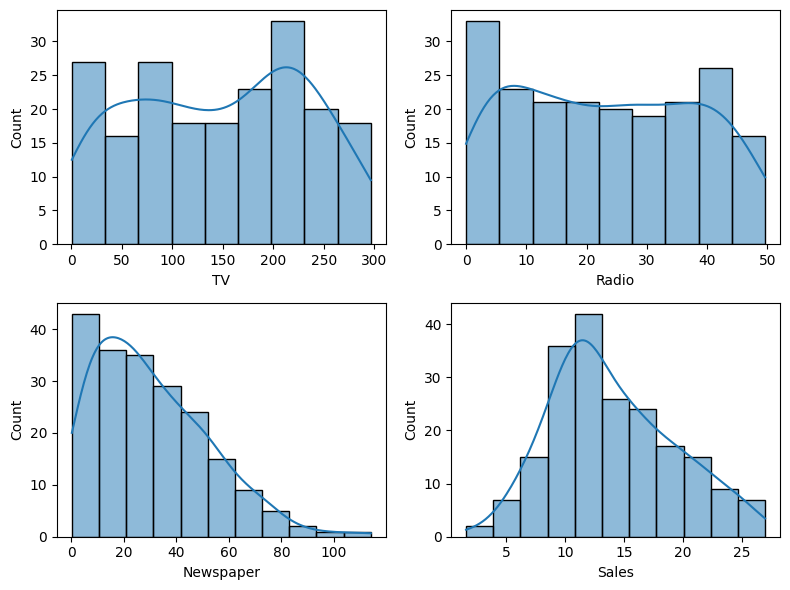

In [48]:
l=['TV','Radio','Newspaper','Sales']
plt.figure(figsize=(8,6))  # Adjust the figure size as needed
for i in l:
    plt.subplot(2,2, l.index(i) + 1)
    sns.histplot(df[i],kde=True)
plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


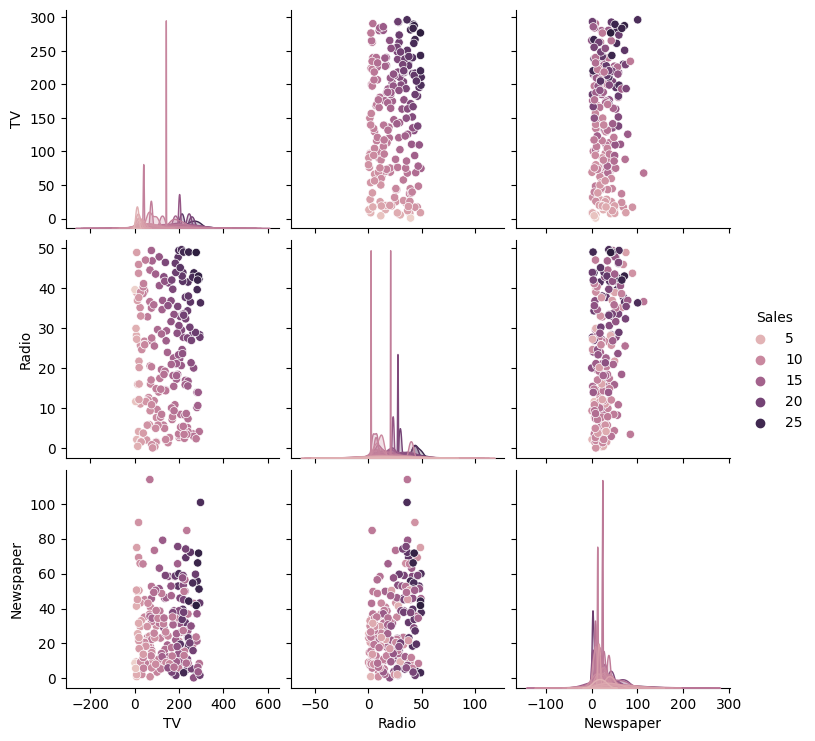

In [49]:
sns.pairplot(df,hue='Sales')

<Axes: >

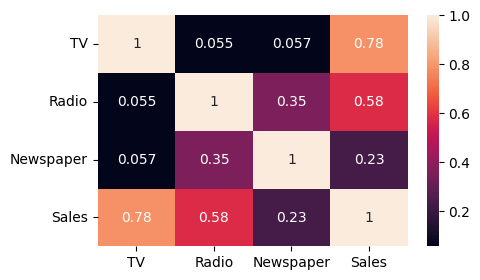

In [50]:
plt.figure(figsize=(5,3))
cor=df.corr()
sns.heatmap(cor,annot=True)

In [51]:
x=df.iloc[:,:3]
y=df.iloc[:,-1]
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [52]:
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
x=pd.DataFrame(x)
x.head(9)

,0,1,2
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
5,-1.615408,1.731034,2.045930
6,-1.045577,0.643905,-0.324708
7,-0.313437,-0.247406,-0.872487
8,-1.616576,-1.429069,-1.360424


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [54]:
def scores(y_test,y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print("Root_Mean_Squared_error: ", rmse)
    print("R2 Score (Accuracy): {:.2f}%".format(r2 * 100))

In [55]:
knn=LinearRegression()
knn


LinearRegression()

In [56]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
scores(y_test,y_pred)

Root_Mean_Squared_error:  2.1777843359613533
R2 Score (Accuracy): 77.69%


In [57]:
TV=120.2
Radio=19.6
Newspaper=11.6
data=[[TV,Radio,Newspaper]]
scaled_value= scaler.transform([[120.2,19.6,11.6]])

prediction=knn.predict(scaled_value)
print(prediction[0])

12.266405028979767


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
